In [50]:
from transformers import pipeline

In [51]:
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

Device set to use cuda:0


In [52]:
emotions = [
    'Happy', 'Sad', 'Angry', 'Calm', 'Nostalgic', 'Anxious', 'Depressed',
    'Moody', 'Elated', 'Relaxed', 'Joyful', 'Disappointed', 'Relief',
    'Gratitude', 'Bored', 'Pride', 'Jealous', 'Optimistic', 'Passion'
]

In [53]:
# Let us try to perform the sentiment analysis

In [54]:
import pandas as pd
import numpy as np

In [55]:
movies_df = pd.read_csv("top_rated_movies.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'top_rated_movies.csv'

In [ ]:
movies_test = movies_df.loc[0:100]

In [ ]:
movies_test

In [ ]:
# Sentiment analysis for descriptions

In [ ]:
emotions = [
    'Happy', 'Sad', 'Angry', 'Calm', 'Nostalgic', 'Anxious', 'Depressed',
    'Moody', 'Elated', 'Relaxed', 'Joyful', 'Disappointed', 'Relief',
    'Gratitude', 'Bored', 'Pride', 'Jealous', 'Optimistic', 'Passion'
]

In [ ]:
def get_emotion_scores(sentences, candidate_labels):
    results = classifier(sentences, candidate_labels=candidate_labels)
    return [dict(zip(r['labels'], r['scores'])) for r in results]

In [ ]:
get_emotion_scores(['I love waterfalls'], emotions)

In [ ]:
descriptions = movies_df['description'].tolist()

In [ ]:
scores_list = get_emotion_scores(descriptions, emotions)

In [ ]:
emotion_df = pd.DataFrame(scores_list)

In [ ]:
df_with_emotions = pd.concat([movies_df, emotion_df], axis=1)

In [ ]:
df_with_emotions

In [ ]:
df_with_emotions['vector'] = df_with_emotions[emotions].values.tolist()

In [ ]:
df_with_emotions['vector'] = df_with_emotions['vector'].apply(np.array)

In [ ]:
df_with_emotions = df_with_emotions[['title',
 'description',
 'rating',
 'poster_url',
 'Happy',
 'Sad',
 'Angry',
 'Calm',
 'Nostalgic',
 'Anxious',
 'Depressed',
 'Moody',
 'Elated',
 'Relaxed',
 'Joyful',
 'Disappointed',
 'Relief',
 'Gratitude',
 'Bored',
 'Pride',
 'Jealous',
 'Optimistic',
 'Passion',
 'vector']]

In [ ]:
df_with_emotions.to_csv('movies_emotions.csv', index=False)

### User input

We used 'emotions' variable to set the ordere of our vectors in df, so our formats are synchronized.

In [ ]:
sentence = ['Wow, my friend']

In [ ]:
user_scores = get_emotion_scores(sentence, emotions)
user_df = pd.DataFrame(user_scores)
user_df = user_df[emotions]

user_vector = user_df.values

In [ ]:
user_vector

### Now the Distance

In [ ]:
df_with_emotions

In [ ]:
df_with_emotions['vector'].apply(lambda x: np.linalg.norm(x - user_vector))

In [ ]:
df_with_emotions.loc[:, 'distance'] = df_with_emotions['vector'].apply(lambda x: np.linalg.norm(x - user_vector))
most_similar_movie = df_with_emotions.loc[df_with_emotions['distance'].idxmin()]

In [ ]:
df_with_emotions.loc[df_with_emotions['distance'].idxmin()]

In [ ]:
most_similar_movie[['title', 'rating', 'description']]

In [ ]:
print(f"{most_similar_movie['title']} \n {most_similar_movie['rating']} \n {most_similar_movie['description']}")

### A final distinct function

In [ ]:
def recommend_movie_by_emotion(user_sentence, emotions, df, get_emotion_scores):
    user_scores = get_emotion_scores(user_sentence, emotions)

    user_df = pd.DataFrame(user_scores)
    user_df = user_df[emotions]
    user_vector = user_df.values.flatten()

    distances = df_with_emotions['vector'].apply(lambda x: np.linalg.norm(x - user_vector))
    most_similar_movie = df_with_emotions.loc[distances.idxmin()]

    print(f"{most_similar_movie['title']} \n {most_similar_movie['rating']} \n {most_similar_movie['description']}")

In [ ]:
recommend_movie_by_emotion(['Bruh'], emotions, df_with_emotions, get_emotion_scores)

In [ ]:
type(df_with_emotions['vector'])

### Final output

In [ ]:
df_with_emotions = pd.read_csv('movies_emotions.csv')

In  my saved csv the numpy array became list so we need to convert it back to numpy array format:

In [ ]:
df_with_emotions['vector'] = df_with_emotions['vector'].apply(lambda s: np.fromstring(s.strip('[]'), sep=','))

In [ ]:
df_with_emotions

Final User Experience:

In [ ]:
user_input = input("Tell me anything you want, dear user!: ")

result = recommend_movie_by_emotion(
    user_sentence=[user_input],
    emotions=emotions,
    df=df_with_emotions,
    get_emotion_scores=get_emotion_scores
)

# Final Version?

In [56]:
from transformers import pipeline

In [57]:
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

Device set to use cuda:0


In [58]:
import pandas as pd
import numpy as np

In [59]:
movies_df = pd.read_csv("Movies_Data.csv")

In [60]:
emotions = [
    'Happy', 'Sad', 'Angry', 'Calm', 'Nostalgic', 'Anxious', 'Depressed',
    'Moody', 'Elated', 'Relaxed', 'Joyful', 'Disappointed', 'Relief',
    'Gratitude', 'Bored', 'Pride', 'Jealous', 'Optimistic', 'Passion'
]

In [61]:
def get_emotion_scores(sentences, candidate_labels):
    results = classifier(sentences, candidate_labels=candidate_labels)
    return [dict(zip(r['labels'], r['scores'])) for r in results]

In [62]:
descriptions = movies_df['description'].tolist()
scores_list = get_emotion_scores(descriptions, emotions)
emotion_df = pd.DataFrame(scores_list)
df_with_emotions = pd.concat([movies_df, emotion_df], axis=1)

In [65]:
# df_with_emotions

In [63]:
df_with_emotions['vector'] = df_with_emotions[emotions].apply(lambda row: row.values, axis=1)

In [64]:
final_df = df_with_emotions[['title', 'description', 'rating', 'collage', 'dominant_colors', 'vector']]

### I got final df, now for movie recommendation system

In [184]:
sentence = ['I love waterfalls']

In [185]:
user_scores = get_emotion_scores(sentence, emotions)
user_df = pd.DataFrame(user_scores)
user_df = user_df[emotions]

user_vector = user_df.values

In [186]:
user_df.values

array([[0.08975343, 0.00343703, 0.00552804, 0.02801907, 0.10779358,
        0.01216916, 0.01080336, 0.02853374, 0.10902184, 0.14347687,
        0.20679854, 0.0046337 , 0.04754355, 0.0320201 , 0.00393715,
        0.01972275, 0.03183136, 0.0628776 , 0.05209905]])

In [187]:
row_idx = final_df['vector'].apply(lambda x: np.linalg.norm(x - user_vector)).idxmin()
final_df.loc[row_idx]

,19
title,Life Is Beautiful
description,A touching story of an Italian book seller of ...
rating,8.447
collage,<PIL.Image.Image image mode=RGB size=2000x450 ...
dominant_colors,"[(40, 41, 36), (225, 212, 205), (139, 116, 104..."
vector,"[0.10906054824590683, 0.01846301555633545, 0.0..."


In [188]:
top_10_movies = final_df.loc[
    final_df['vector']
    .apply(lambda x: np.linalg.norm(x - user_vector))
    .nsmallest(10)
    .index
]

In [189]:
top_10_movies

,title,description,rating,collage,dominant_colors,vector
19,Life Is Beautiful,A touching story of an Italian book seller of ...,8.447,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(40, 41, 36), (225, 212, 205), (139, 116, 104...","[0.10906054824590683, 0.01846301555633545, 0.0..."
16,Interstellar,The adventures of a group of explorers who mak...,8.455,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(22, 29, 32), (203, 197, 187), (140, 159, 164...","[0.04704299196600914, 0.013181029818952084, 0...."
10,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8.488,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(25, 20, 21), (201, 168, 134), (117, 84, 65),...","[0.051940564066171646, 0.02874625474214554, 0...."
12,Your Name.,High schoolers Mitsuha and Taki are complete s...,8.500,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(57, 69, 96), (200, 180, 183), (134, 188, 209...","[0.04461796209216118, 0.031333498656749725, 0...."
8,The Green Mile,A supernatural tale set on death row in a Sout...,8.505,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(193, 148, 108), (22, 23, 20), (108, 77, 53),...","[0.0493214949965477, 0.019088298082351685, 0.0..."
15,Seven Samurai,A samurai answers a village's request for prot...,8.456,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(38, 38, 38), (200, 201, 201), (128, 128, 128...","[0.034109264612197876, 0.022172747179865837, 0..."
5,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",8.537,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(209, 175, 162), (33, 40, 49), (123, 174, 183...","[0.04374663531780243, 0.026125682517886162, 0...."
17,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",8.455,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(187, 154, 137), (21, 15, 14), (106, 81, 72),...","[0.040900181978940964, 0.029517853632569313, 0..."
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,8.571,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(222, 183, 148), (49, 32, 20), (144, 102, 63)...","[0.032322049140930176, 0.020613785833120346, 0..."
9,Parasite,"All unemployed, Ki-taek's family takes peculia...",8.499,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(36, 35, 32), (187, 176, 160), (116, 103, 83)...","[0.03785499930381775, 0.04883730039000511, 0.0..."


### Now finally hopefully let us connect it to colors

In [190]:
user_scores

[{'Joyful': 0.20679853856563568,
  'Relaxed': 0.14347687363624573,
  'Elated': 0.10902183502912521,
  'Nostalgic': 0.10779357701539993,
  'Happy': 0.08975342661142349,
  'Optimistic': 0.0628776028752327,
  'Passion': 0.05209904909133911,
  'Relief': 0.04754355177283287,
  'Gratitude': 0.032020095735788345,
  'Jealous': 0.03183135762810707,
  'Moody': 0.028533736243844032,
  'Calm': 0.028019068762660027,
  'Pride': 0.019722754135727882,
  'Anxious': 0.012169158086180687,
  'Depressed': 0.010803364217281342,
  'Angry': 0.005528039298951626,
  'Disappointed': 0.004633695352822542,
  'Bored': 0.003937151283025742,
  'Sad': 0.0034370324574410915}]

In [192]:
# top1_user_emotion = max(user_scores[0], key=user_scores[0].get)

In [191]:
top1_user_emotion, top1_emotion_value = sorted(user_scores[0].items(), key=lambda x: x[1], reverse=True)[0]
top2_user_emotion, top2_emotion_value = sorted(user_scores[0].items(), key=lambda x: x[1], reverse=True)[1]

In [193]:
top1_user_emotion, top2_user_emotion

('Joyful', 'Relaxed')

In [194]:
# Creating my emotion palette
colors = {
    "Happy": [
        (255, 223, 0),   # Yellow
        (255, 105, 180), # Bright Pink
        (255, 165, 0),   # Orange
        (255, 240, 245), # Lavender Blush
        (255, 255, 102), # Light Yellow
        (255, 182, 193), # Light Pink
        (255, 215, 0),   # Gold
        (255, 250, 205)  # Lemon Chiffon
    ],
    "Sad": [
        (64, 64, 64),    # Dark Grey
        (70, 130, 180),  # Steel Blue
        (95, 158, 160),  # Cadet Blue
        (105, 105, 105), # Dark Slate Gray
        (119, 136, 153), # Light Slate Gray
        (72, 61, 139),   # Dark Slate Blue
        (100, 149, 237), # Cornflower Blue
        (176, 196, 222)  # Light Steel Blue
    ],
    "Angry": [
        (255, 0, 0),     # Red
        (255, 69, 0),    # Orange Red
        (139, 0, 0),     # Dark Red
        (178, 34, 34),   # Firebrick
        (220, 20, 60),   # Crimson
        (255, 99, 71),   # Tomato
        (128, 0, 0),     # Maroon
        (255, 36, 0)     # Scarlet
    ],
    "Calm": [
        (144, 238, 144), # Light Green
        (255, 165, 0),   # Orange
        (173, 216, 230), # Light Blue
        (224, 255, 255), # Light Cyan
        (175, 238, 238), # Pale Turquoise
        (152, 251, 152), # Pale Green
        (240, 255, 255), # Azure
        (176, 224, 230)  # Powder Blue
    ],
    "Nostalgic": [
        (255, 165, 0),   # Bright Orange
        (230, 230, 250), # Lavender
        (255, 218, 185), # Peach Puff
        (222, 184, 135), # Burlywood
        (250, 235, 215), # Antique White
        (210, 180, 140), # Tan
        (245, 222, 179), # Wheat
        (255, 239, 213)  # Papaya Whip
    ],
    "Anxious": [
        (255, 99, 71),   # Tomato
        (255, 105, 180), # Hot Pink
        (255, 0, 255),   # Magenta
        (255, 140, 0),   # Dark Orange
        (218, 112, 214), # Orchid
        (255, 20, 147),  # Deep Pink
        (205, 92, 92),   # Indian Red
        (139, 0, 139)    # Dark Magenta
    ],
    "Depressed": [
        (48, 48, 48),    # Dark Grey
        (169, 169, 169), # Dark Gray
        (112, 128, 144), # Slate Gray
        (25, 25, 112),   # Midnight Blue
        (0, 0, 139),     # Dark Blue
        (70, 70, 70),    # Charcoal
        (119, 136, 153), # Light Slate Gray
        (105, 105, 105)  # Dim Gray
    ],
    "Moody": [
        (128, 0, 128),   # Purple
        (102, 51, 153),  # Dark Orchid
        (169, 169, 169), # Dark Grey
        (75, 0, 130),    # Indigo
        (123, 104, 238), # Medium Slate Blue
        (106, 90, 205),  # Slate Blue
        (199, 21, 133),  # Medium Violet Red
        (72, 61, 139)    # Dark Slate Blue
    ],
    "Elated": [
        (0, 255, 127),   # Spring Green
        (128, 0, 128),   # Purple
        (255, 165, 0),   # Orange
        (255, 215, 0),   # Gold
        (124, 252, 0),   # Lawn Green
        (255, 105, 180), # Hot Pink
        (240, 128, 128), # Light Coral
        (173, 255, 47)   # Green Yellow
    ],
    "Relaxed": [
        (144, 238, 144), # Light Green
        (173, 216, 230), # Light Blue
        (255, 239, 178), # Light Yellow
        (176, 224, 230), # Powder Blue
        (152, 251, 152), # Pale Green
        (255, 250, 205), # Lemon Chiffon
        (240, 255, 255), # Azure
        (224, 255, 255)  # Light Cyan
    ],
    "Joyful": [
        (255, 223, 0),   # Bright Yellow
        (255, 105, 180), # Bright Pink
        (0, 255, 127),   # Medium Spring Green
        (255, 182, 193), # Light Pink
        (255, 250, 205), # Lemon Chiffon
        (255, 69, 0),    # Orange Red
        (255, 255, 102), # Light Yellow
        (255, 215, 0)    # Gold
    ],
    "Disappointed": [
        (169, 169, 169), # Dark Grey
        (192, 192, 192), # Silver
        (128, 128, 128), # Grey
        (105, 105, 105), # Dim Gray
        (119, 136, 153), # Light Slate Gray
        (112, 128, 144), # Slate Gray
        (160, 160, 160), # Medium Gray
        (211, 211, 211)  # Light Gray
    ],
    "Relief": [
        (0, 255, 255),   # Aqua
        (173, 216, 230), # Light Blue
        (144, 238, 144), # Light Green
        (224, 255, 255), # Light Cyan
        (175, 238, 238), # Pale Turquoise
        (152, 251, 152), # Pale Green
        (240, 255, 240), # Honeydew
        (240, 255, 255)  # Azure
    ],
    "Gratitude": [
        (255, 223, 186), # Peach
        (186, 85, 211),  # Medium Orchid
        (255, 105, 180), # Hot Pink
        (218, 112, 214), # Orchid
        (255, 182, 193), # Light Pink
        (240, 230, 140), # Khaki
        (255, 240, 245), # Lavender Blush
        (230, 230, 250)  # Lavender
    ],
    "Bored": [
        (169, 169, 169), # Dark Grey
        (255, 255, 255), # White
        (224, 224, 224), # Light Grey
        (211, 211, 211), # Lighter Grey
        (192, 192, 192), # Silver
        (245, 245, 245), # White Smoke
        (128, 128, 128), # Grey
        (240, 240, 240)  # Gainsboro
    ],
    "Pride": [
        (255, 215, 0),   # Gold
        (0, 0, 255),     # Blue
        (255, 0, 255),   # Magenta
        (255, 0, 0),     # Red
],
"Jealous": [
    (0, 128, 0),     # Dark Green
    (154, 205, 50),  # Yellow Green
    (60, 179, 113),  # Medium Sea Green
    (46, 139, 87),   # Sea Green
    (85, 107, 47),   # Dark Olive Green
    (107, 142, 35),  # Olive Drab
    (0, 100, 0),     # Forest Green
    (127, 255, 0)    # Chartreuse
],
"Optimistic": [
    (255, 223, 186), # Soft Peach
    (255, 223, 0),   # Yellow
    (0, 255, 255),   # Cyan
    (255, 250, 205), # Lemon Chiffon
    (255, 239, 213), # Papaya Whip
    (144, 238, 144), # Light Green
    (255, 215, 0),   # Gold
    (255, 192, 203)  # Pink
],
"Passion": [
    (255, 160, 122), # Light Salmon
    (255, 105, 180), # Hot Pink
    (255, 20, 147),  # Deep Pink
    (199, 21, 133),  # Medium Violet Red
    (255, 0, 0),     # Red
    (255, 69, 0),    # Orange Red
    (178, 34, 34),   # Firebrick
    (219, 112, 147)  # Pale Violet Red
]
}

In [76]:
from PIL import Image
from IPython.display import display

In [195]:
def display_gradient_palette(palette):
    width, height = 300, 50
    gradient = Image.new('RGB', (width, height))

    for x in range(width):
        ratio = (x / (width - 1)) * (len(palette) - 1)
        idx = int(ratio)
        blend_ratio = ratio - idx
        c1 = palette[idx]
        c2 = palette[min(idx + 1, len(palette) - 1)]
        blend = tuple(
            int(c1[i] * (1 - blend_ratio) + c2[i] * blend_ratio)
            for i in range(3)
        )
        for y in range(height):
            gradient.putpixel((x, y), blend)
    display(gradient)

In [196]:
user_palette_emotion1 = colors.get(top1_user_emotion, [(0, 0, 0)])
user_palette_emotion2 = colors.get(top2_user_emotion, [(0, 0, 0)])

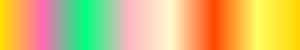

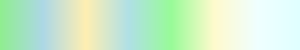

In [197]:
display_gradient_palette(user_palette_emotion1)
display_gradient_palette(user_palette_emotion2)

In [80]:
### Now find the most similar palette among the most similar movies by text sentiment analysis

In [90]:
import math
import ast

In [198]:
def color_distance(c1, c2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(c1, c2)))

In [199]:
def similarity_percentage(dominant_colors, palette, threshold=60):
    matches = 0
    for color in dominant_colors:
        if any(color_distance(color, p_color) < threshold for p_color in palette):
            matches += 1
    return (matches / len(dominant_colors)) * 100

In [200]:
top_10_movies.iloc[0]['dominant_colors'] # this is a string - possible error in the future

'[(40, 41, 36), (225, 212, 205), (139, 116, 104), (158, 162, 158), (145, 135, 159), (197, 41, 59)]'

In [201]:
for index, row in top_10_movies.iterrows():
    palette_movie = ast.literal_eval(top_10_movies.loc[index]['dominant_colors'])
    top1_emotion_similarity = similarity_percentage(palette_movie, user_palette_emotion1)
    top2_emotion_similarity = similarity_percentage(palette_movie, user_palette_emotion2)

    combined_similarity = top1_emotion_similarity + top2_emotion_similarity

    print(combined_similarity)

33.33333333333333
33.33333333333333
0.0
33.33333333333333
0.0
33.33333333333333
16.666666666666664
0.0
16.666666666666664
0.0


In [202]:
best_score = -1
best_movie = None

results = []

# Step 1: Collect similarity scores for each movie
for index, row in top_10_movies.iterrows():
    palette_movie = ast.literal_eval(row['dominant_colors'])
    top1_emotion_similarity = similarity_percentage(palette_movie, user_palette_emotion1)
    top2_emotion_similarity = similarity_percentage(palette_movie, user_palette_emotion2)

    combined_similarity = top1_emotion_similarity + top2_emotion_similarity

    # Store movie row, similarity, and rating
    results.append({
        'movie': row,
        'combined_similarity': combined_similarity,
        'rating': row['rating']
    })

# Step 2: Convert to DataFrame (optional, but convenient)
results_df = pd.DataFrame(results)

# Step 3: Get the maximum similarity
max_similarity = results_df['combined_similarity'].max()

# Step 4: Filter movies with max similarity
most_similar_movies = results_df[results_df['combined_similarity'] == max_similarity]

# Step 5: Select the one with the highest rating among them
best_match_row = most_similar_movies.loc[most_similar_movies['rating'].idxmax()]

In [203]:
# Final output
print("🎬 Best match:")
print(best_match_row['movie'])
print(f"🎯 Combined similarity: {best_match_row['combined_similarity']:.2%}")
print(f"⭐ Rating: {best_match_row['rating']}")

🎬 Best match:
title                                                     Your Name.
description        High schoolers Mitsuha and Taki are complete s...
rating                                                           8.5
collage            <PIL.Image.Image image mode=RGB size=2000x450 ...
dominant_colors    [(57, 69, 96), (200, 180, 183), (134, 188, 209...
vector             [0.04461796209216118, 0.031333498656749725, 0....
Name: 12, dtype: object
🎯 Combined similarity: 3333.33%
⭐ Rating: 8.5


In [204]:
best_match_row['movie']

,12
title,Your Name.
description,High schoolers Mitsuha and Taki are complete s...
rating,8.5
collage,<PIL.Image.Image image mode=RGB size=2000x450 ...
dominant_colors,"[(57, 69, 96), (200, 180, 183), (134, 188, 209..."
vector,"[0.04461796209216118, 0.031333498656749725, 0...."


In [205]:
title_of_best_movie = best_match_row['movie'].loc['title']

In [206]:
backdrops_of_best_match = df_with_emotions[df_with_emotions['title'] == title_of_best_movie]['backdrop_urls']

In [172]:
import requests
from bs4 import BeautifulSoup as bs
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [207]:
target_size = (400, 225)
rows, cols = 2, 5

def create_collage_from_urls(urls):
    images = []
    for url in urls:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content)).convert("RGB")
            img = img.resize(target_size)
            images.append(img)
        except Exception as e:
            print(f"Failed to load image {url}: {e}")

    collage_width = target_size[0] * cols
    collage_height = target_size[1] * rows
    collage = Image.new("RGB", (collage_width, collage_height))

    for i, img in enumerate(images):
        row = i // cols
        col = i % cols
        x = col * target_size[0]
        y = row * target_size[1]
        collage.paste(img, (x, y))

    return collage

In [208]:
backdrops_of_best_match.values # I need to modify the format

array(["['https://image.tmdb.org/t/p/w1280/qVG2Yd54zv8XCK87vPqTfPLNMuj.jpg', 'https://image.tmdb.org/t/p/w1280/2HjZoV9LalaWckmYACNOq7GDCiC.jpg', 'https://image.tmdb.org/t/p/w1280/ax3WG7bJ24QYvAJkiZOROLNM50T.jpg', 'https://image.tmdb.org/t/p/w1280/iCk0GuGYcmyKbfZIIs3ZCFs5CAv.jpg', 'https://image.tmdb.org/t/p/w1280/olDiGphkdgYMlp3LFhftNoDNych.jpg', 'https://image.tmdb.org/t/p/w1280/j5KH4hjhFl5hVkJtOsQKx9bNDWa.jpg', 'https://image.tmdb.org/t/p/w1280/wNInB2JyuEEkRCPovAXW3aNQPjk.jpg', 'https://image.tmdb.org/t/p/w1280/lHSO3iZ1XUnR03B6rZzrZsgSn6o.jpg', 'https://image.tmdb.org/t/p/w1280/AfXdkBDuKyR6WXcyiXaVHeTZokX.jpg', 'https://image.tmdb.org/t/p/w1280/de6skzU80j6GivJGTLC1cCZKaUB.jpg']"],
      dtype=object)

In [209]:
best_match_backdrops_urls = ast.literal_eval(backdrops_of_best_match.values[0])

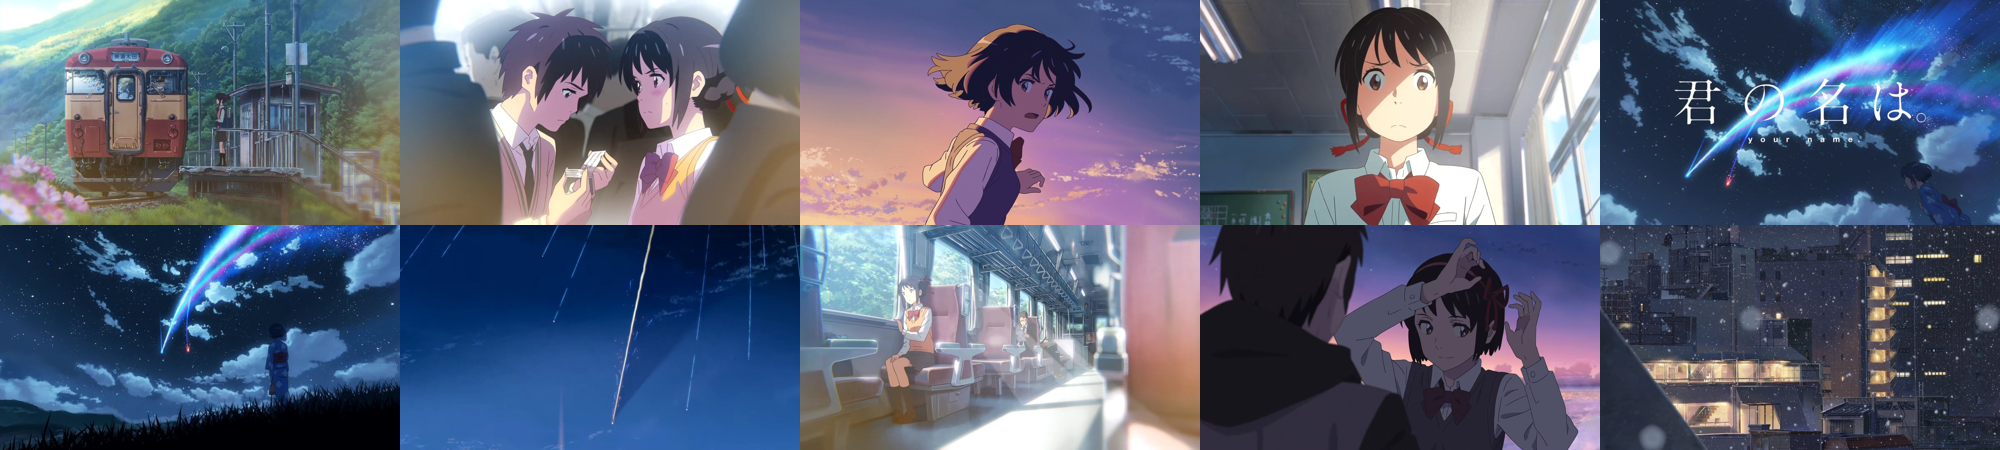

In [210]:
create_collage_from_urls(best_match_backdrops_urls)

## Final output?!

In [211]:
# Final output
print("🎬 Best match:")
print(best_match_row['movie'].loc['title'])
print(best_match_row['movie'].loc['description'])
print(f"⭐ Rating: {best_match_row['rating']}")

🎬 Best match:
Your Name.
High schoolers Mitsuha and Taki are complete strangers living separate lives. But one night, they suddenly switch places. Mitsuha wakes up in Taki’s body, and he in hers. This bizarre occurrence continues to happen randomly, and the two must adjust their lives around each other.
⭐ Rating: 8.5


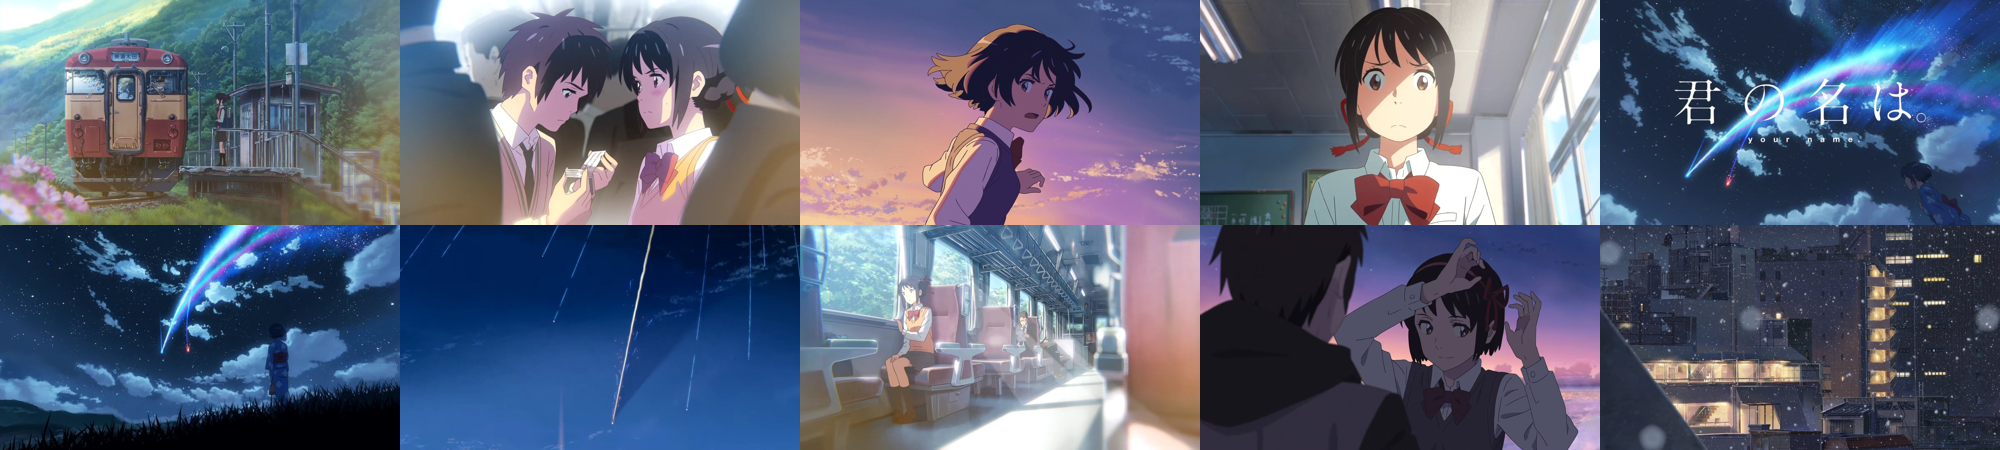

In [212]:
create_collage_from_urls(best_match_backdrops_urls)

Emotion palette of our user:


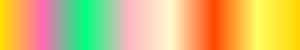

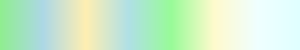

In [213]:
print("Emotion palette of our user:")
display_gradient_palette(user_palette_emotion1)
display_gradient_palette(user_palette_emotion2)